# Step 3:: Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the Data set
df=pd.read_csv('Group_14_Clean_Data.csv')
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,280.2195,319.1130,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


In [3]:
# Define features and target variable

X = df.drop(columns=['Powerall']) 
y = df['Powerall'] 

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Perform scaling after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Initialize models
models_original= {
    "Linear_Regression": LinearRegression(),
    "K_Nearest_Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random_Forest": RandomForestRegressor(n_estimators=50,max_depth= 10,random_state=42),
    "SVM_Linear_Kernel": SVR(kernel="linear"),
    "SVM_RBF_Kernel": SVR(kernel='rbf',C=100,gamma=0.1),
    "Gradient_Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
}

In [8]:
# Train each model and calculate performance on both train and test data
results = {}
predictions_train = {}
predictions_test = {}

for model_name, model in models_original.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    predictions_train[model_name] = y_train_pred
    predictions_test[model_name] = y_test_pred

    # Calculate RMSE and R-squared for both train and test
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    results[model_name] = {"Train_RMSE": rmse_train, "Test_RMSE": rmse_test,
                           "Train_R2": r2_train, "Test_R2": r2_test}
    print(f"{model_name} - Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}, Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}")


Linear_Regression - Train RMSE: 369.9001, Test RMSE: 230.5094, Train R2: 1.0000, Test R2: 1.0000
K_Nearest_Neighbors - Train RMSE: 16163.5528, Test RMSE: 19646.6773, Train R2: 0.9143, Test R2: 0.8763
Random_Forest - Train RMSE: 20936.7990, Test RMSE: 23126.8528, Train R2: 0.8563, Test R2: 0.8286
SVM_Linear_Kernel - Train RMSE: 370.0723, Test RMSE: 229.9771, Train R2: 1.0000, Test R2: 1.0000
SVM_RBF_Kernel - Train RMSE: 38086.0962, Test RMSE: 38435.6260, Train R2: 0.5244, Test R2: 0.5267
Gradient_Boosting - Train RMSE: 18406.8821, Test RMSE: 18897.0313, Train R2: 0.8889, Test R2: 0.8856


In [9]:
# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T

In [10]:
results_df

,Train_RMSE,Test_RMSE,Train_R2,Test_R2
Linear_Regression,369.900126,230.509406,0.999955,0.999983
K_Nearest_Neighbors,16163.552773,19646.677280,0.914344,0.876329
Random_Forest,20936.799011,23126.852815,0.856285,0.828635
SVM_Linear_Kernel,370.072267,229.977098,0.999955,0.999983
SVM_RBF_Kernel,38086.096209,38435.626044,0.524429,0.526679
Gradient_Boosting,18406.882068,18897.031345,0.888918,0.885587


The model evaluation results reveal the following insights:

1. Linear Regression and SVM (Linear Kernel): Both models performed exceptionally well, achieving near-perfect scores with Train and Test R² values of 1.0000. RMSE values for both models are significantly lower than other models, indicating their suitability for this dataset.

2. K-Nearest Neighbors (KNN): Performed moderately well, with a Train R² of 0.9143 and a Test R² of 0.8763. Higher RMSE values compared to Linear Regression suggest a slightly less accurate prediction.

3. Random Forest:Exhibited reasonable performance with a Train R² of 0.8563 and a Test R² of 0.8286. RMSE values indicate it is less accurate than KNN and linear models.

4. SVM (RBF Kernel): Showed poor performance, with R² scores of 0.5244 (Train) and 0.5267 (Test), and the highest RMSE among all models.This suggests that the RBF kernel may not be suitable for this dataset.

5. Gradient Boosting: Achieved decent performance with Train R² of 0.8889 and Test R² of 0.8856. RMSE values are comparable to KNN but less optimal than Linear Regression.

**Key Observation:**

* Linear Regression and SVM (Linear Kernel) stand out as the best-performing models, indicating that the dataset's linear relationships are well captured by these methods.

* Other models like KNN and Gradient Boosting are reasonable alternatives but are less effective compared to the linear approaches.

* SVM (RBF Kernel) is not suitable for this dataset, likely due to the absence of non-linear relationships.

After performing Model Evaluation and Hypertuning and other steps, we will reach our final conclusion.

# Step 4: Model Evaluation

## Step 4.1: Model Evaluation and Comparison

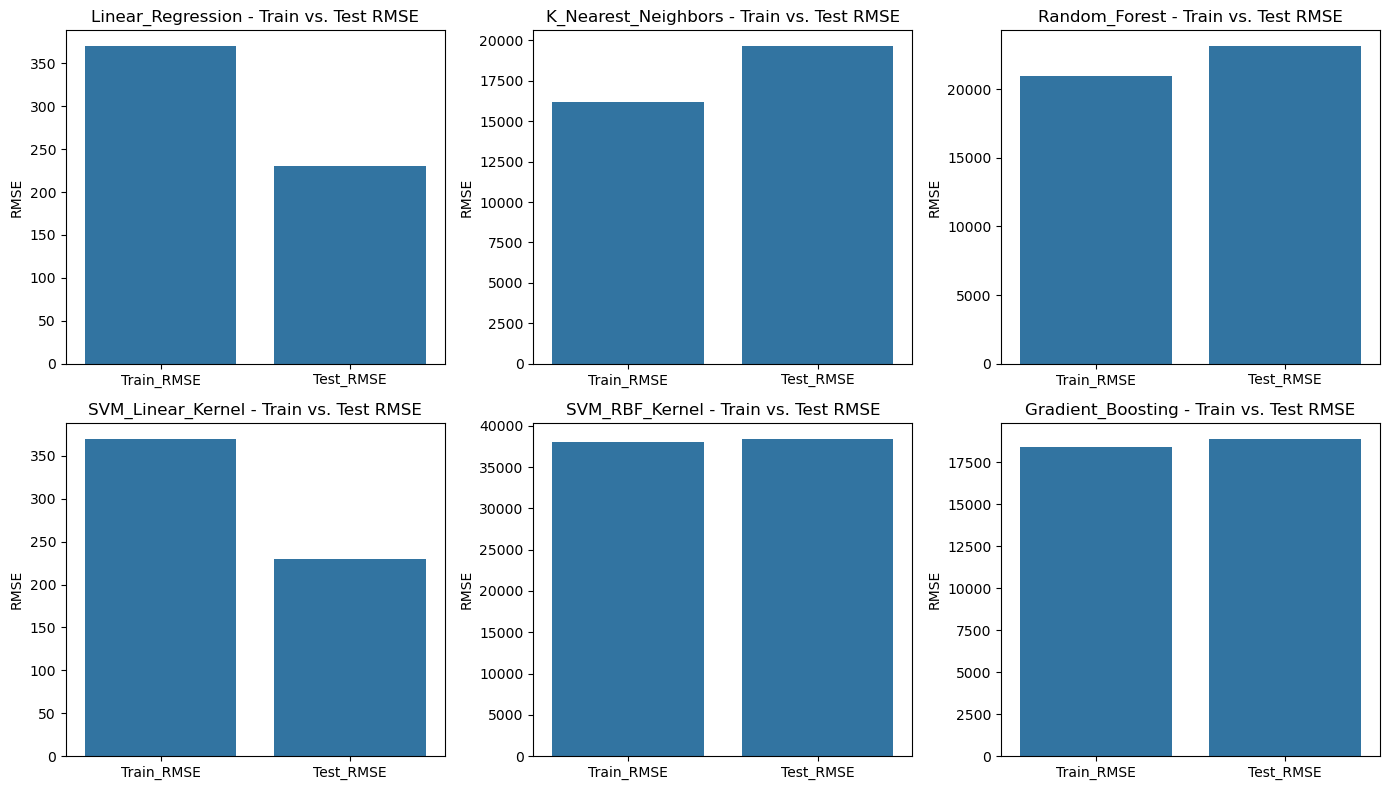

In [11]:
# Visualization - Train vs Test RMSE
plt.figure(figsize=(14, 8))
for i, (model_name, model_results) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=['Train_RMSE', 'Test_RMSE'], y=[model_results["Train_RMSE"], model_results["Test_RMSE"]])
    plt.title(f'{model_name} - Train vs. Test RMSE')
    plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

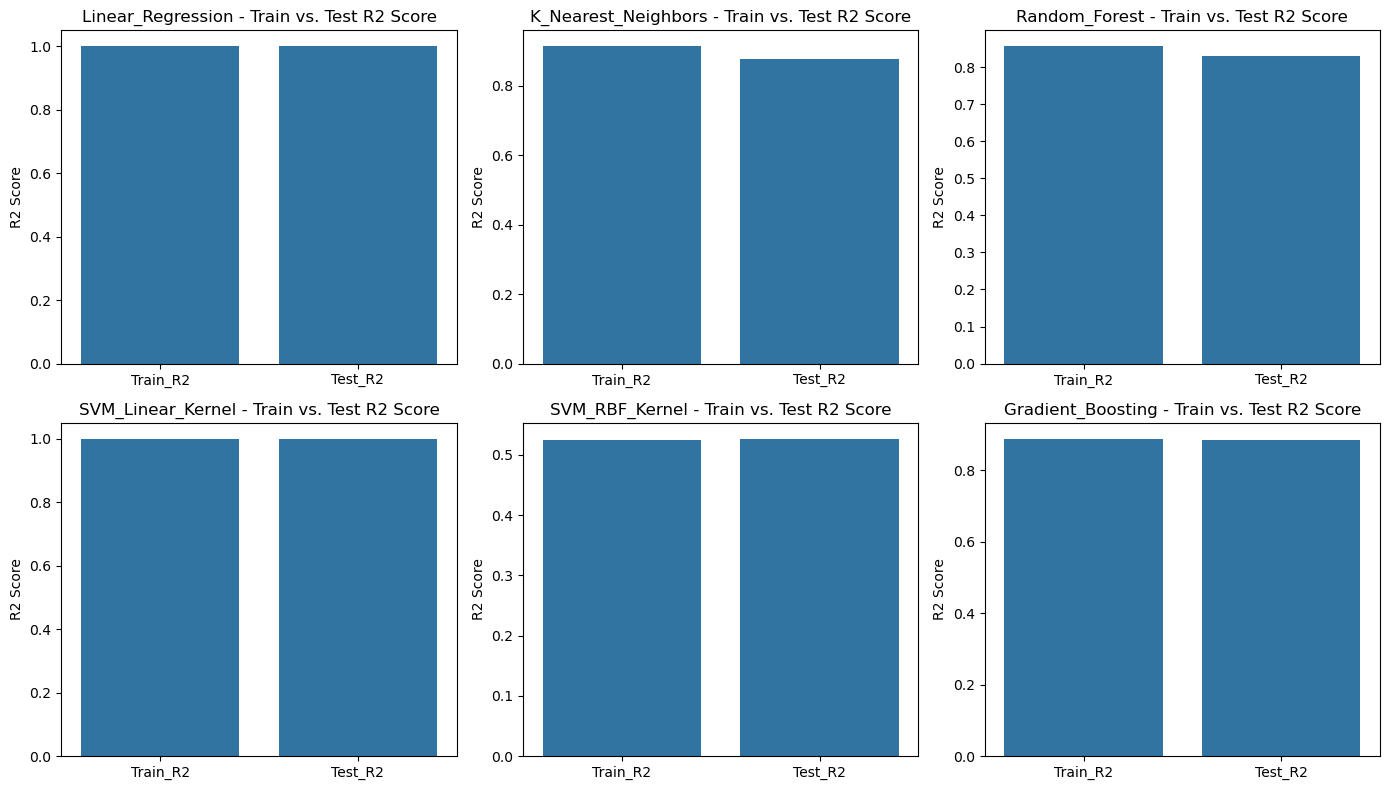

In [12]:
# Visualization - Train vs Test R2 Score
plt.figure(figsize=(14, 8))
for i, (model_name, model_results) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=['Train_R2', 'Test_R2'], y=[model_results["Train_R2"], model_results["Test_R2"]])
    plt.title(f'{model_name} - Train vs. Test R2 Score')
    plt.ylabel("R2 Score")
plt.tight_layout()
plt.show()

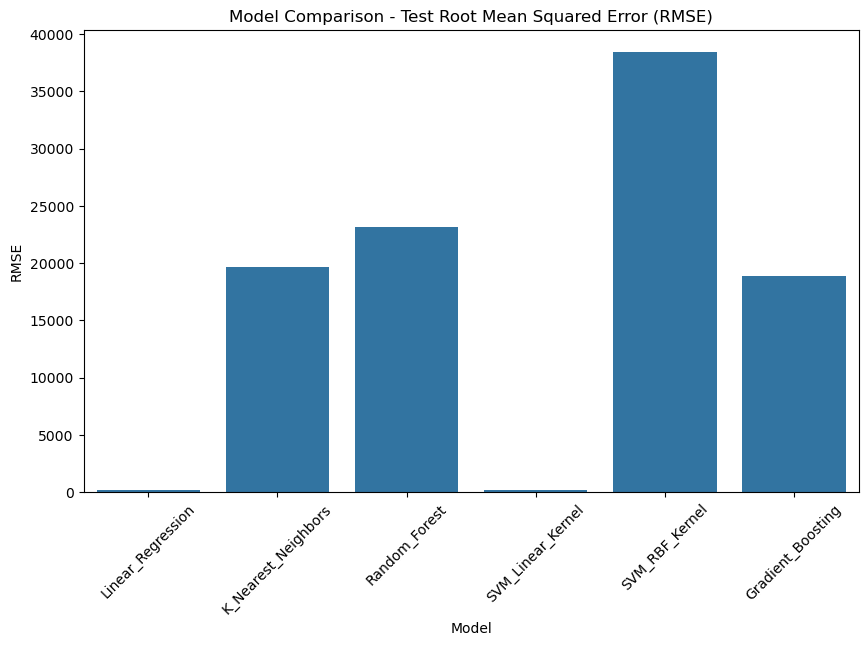

In [13]:
# Visualization - Test RMSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Test_RMSE"])
plt.title("Model Comparison - Test Root Mean Squared Error (RMSE)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

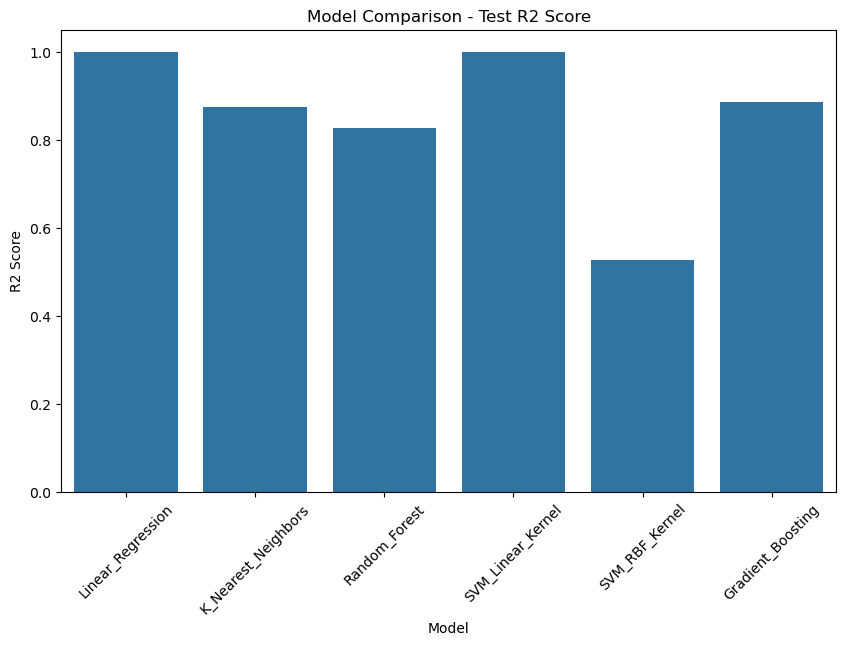

In [14]:
# Visualization - Test R2 Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Test_R2"])
plt.title("Model Comparison - Test R2 Score")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

## Step 4.3: Hyperparameter Tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for each model
param_grids = {
    "K_Nearest_Neighbors": {
        "n_neighbors": [3, 5, 10, 20],
        "weights": ['uniform', 'distance']
    },
    "Random_Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
    "SVM_Linear_Kernel": {
        "C": [0.1, 1, 10]
    },
    "SVM_RBF_Kernel": {
        "C": [0.1, 1, 10],
        "gamma": ['scale', 'auto']
    },
    "Gradient_Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}


In [29]:
warnings.simplefilter(action='ignore', category=UserWarning)

In [31]:
# Perform Random Search for each model
tuned_models = {}
best_params = {}

for model_name, model in models_original.items():
    if model_name in param_grids:  # Skip Linear Regression (no hyperparameters)
        print(f"Tuning {model_name}...")
        rand_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],  
            scoring='neg_mean_squared_error',
            cv=3,
            random_state=42,
            n_iter=10
        )
        rand_search.fit(X_train_scaled, y_train)
        tuned_models[model_name] = rand_search.best_estimator_
        best_params[model_name] = rand_search.best_params_
        print(f"Best Parameters for {model_name}: {rand_search.best_params_}")

Tuning K_Nearest_Neighbors...
Best Parameters for K_Nearest_Neighbors: {'weights': 'distance', 'n_neighbors': 10}
Tuning Random_Forest...
Best Parameters for Random_Forest: {'n_estimators': 200, 'max_depth': None}
Tuning SVM_Linear_Kernel...
Best Parameters for SVM_Linear_Kernel: {'C': 10}
Tuning SVM_RBF_Kernel...
Best Parameters for SVM_RBF_Kernel: {'gamma': 'scale', 'C': 10}
Tuning Gradient_Boosting...
Best Parameters for Gradient_Boosting: {'n_estimators': 200, 'learning_rate': 0.2}


In [32]:
# Store results for tuned models
tuned_results = {}

for model_name, model in tuned_models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    tuned_results[model_name] = {"Train_RMSE": train_rmse, "Test_RMSE": test_rmse,
                                 "Train_R2": train_r2, "Test_R2": test_r2}

In [33]:
# Convert results to DataFrame
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                       Train_RMSE     Test_RMSE  Train_R2   Test_R2
K_Nearest_Neighbors      0.003368  19117.054832  1.000000  0.882907
Random_Forest         6125.410789  16396.287382  0.987699  0.913865
SVM_Linear_Kernel      370.071964    229.977465  0.999955  0.999983
SVM_RBF_Kernel       47754.606530  48428.936874  0.252324  0.248553
Gradient_Boosting     6720.336957   7247.047816  0.985193  0.983173


In [34]:
# Visualize performance before and after tuning
original_results_df = pd.DataFrame(results).T

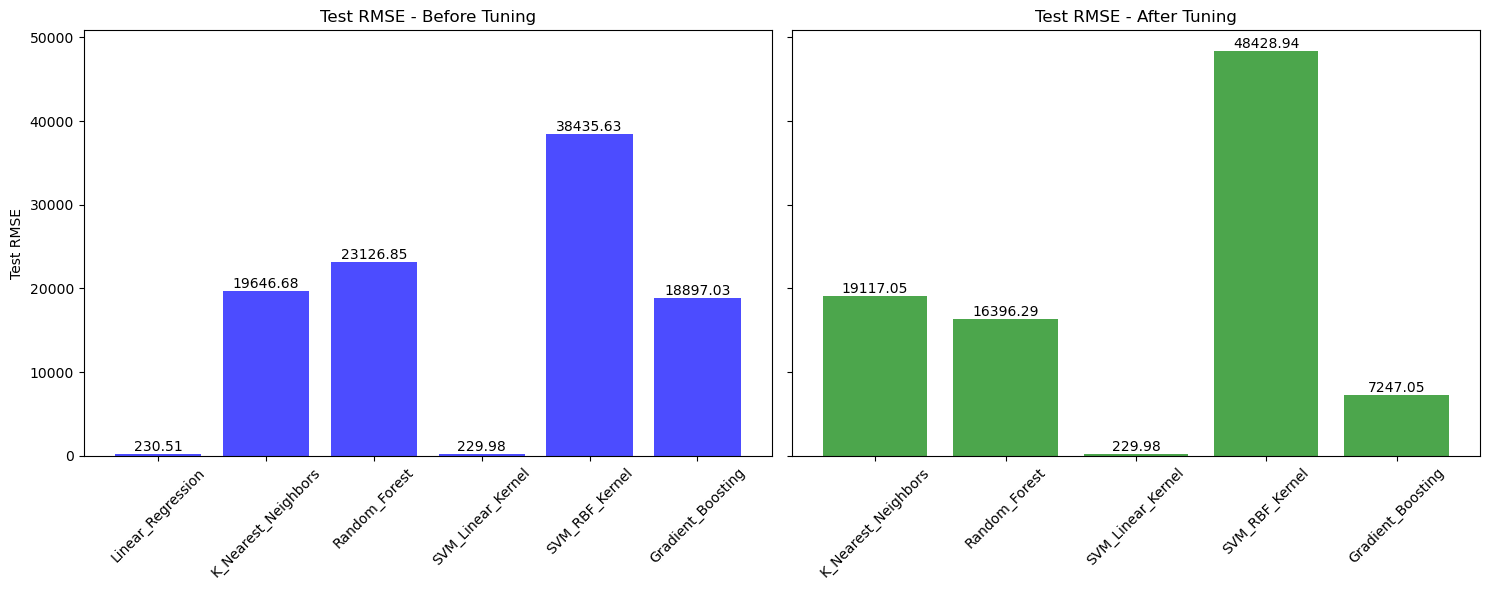

In [35]:
# Set up a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot Original Results
axes[0].bar(original_results_df.index, original_results_df["Test_RMSE"], color='blue', alpha=0.7)
axes[0].set_title("Test RMSE - Before Tuning")
axes[0].set_ylabel("Test RMSE")
axes[0].tick_params(axis='x', rotation=45)

# Plot Tuned Results
axes[1].bar(tuned_results_df.index, tuned_results_df["Test_RMSE"], color='green', alpha=0.7)
axes[1].set_title("Test RMSE - After Tuning")
axes[1].tick_params(axis='x', rotation=45)

for i, val in enumerate(original_results_df["Test_RMSE"]):
    axes[0].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)
for i, val in enumerate(tuned_results_df["Test_RMSE"]):
    axes[1].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

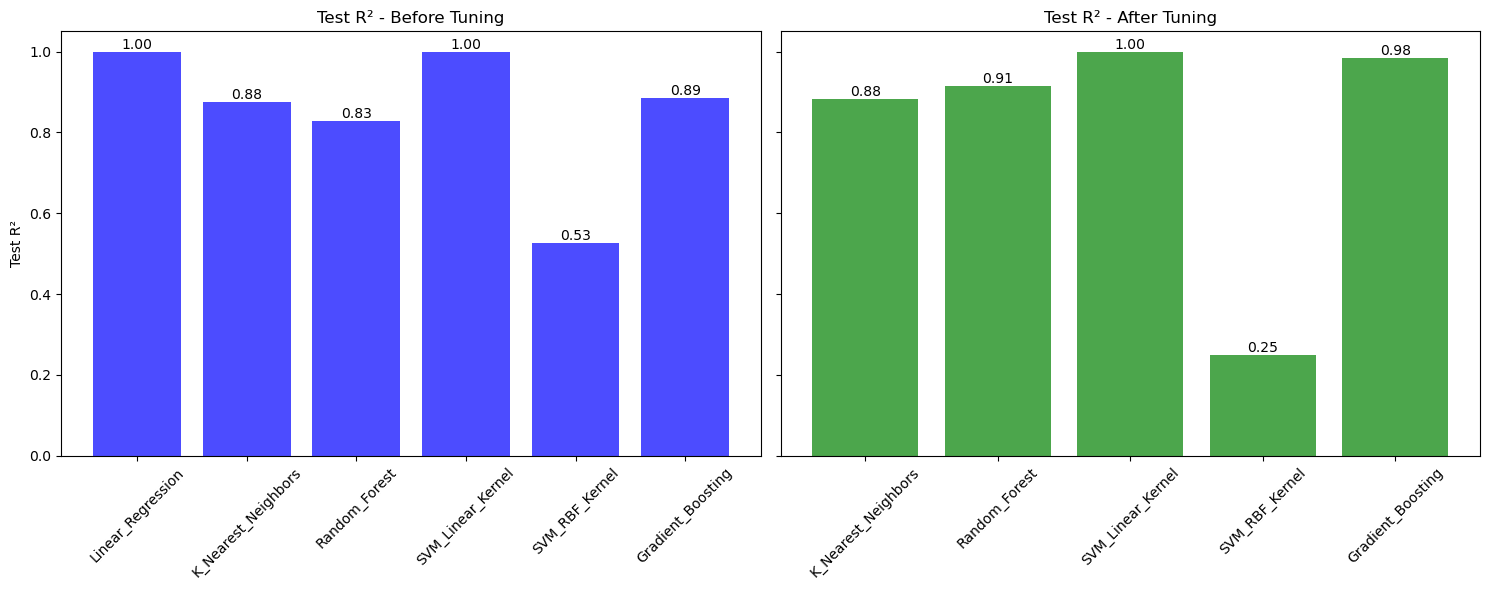

In [36]:
# Set up a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot Original Results
axes[0].bar(original_results_df.index, original_results_df["Test_R2"], color='blue', alpha=0.7)
axes[0].set_title("Test R² - Before Tuning")
axes[0].set_ylabel("Test R²")
axes[0].tick_params(axis='x', rotation=45)

# Plot Tuned Results
axes[1].bar(tuned_results_df.index, tuned_results_df["Test_R2"], color='green', alpha=0.7)
axes[1].set_title("Test R² - After Tuning")
axes[1].tick_params(axis='x', rotation=45)

for i, val in enumerate(original_results_df["Test_R2"]):
    axes[0].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)
for i, val in enumerate(tuned_results_df["Test_R2"]):
    axes[1].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()
